# Import Libraries

In [294]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Cleaning

In [295]:
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Documents\Hackathon\IndustriAI\Industry-Baby\archive\test.csv").copy()
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,2022.000,Good,809.98,35.030,22 Years and 9 Months,No,49.575,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,...,4.000,Good,809.98,33.053,22 Years and 10 Months,No,49.575,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,...,4.000,Good,809.98,33.812,NaN,No,49.575,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.000,Good,809.98,32.431,23 Years and 0 Months,No,49.575,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.987,2,...,5.000,Good,605.03,25.927,27 Years and 3 Months,No,18.816,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [297]:
# Duplicate check
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")
        
duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


In [298]:
# dropping unnecessary columns for modelling
df = df.drop(['ID','Customer_ID','Month','Name','SSN', 'Type_of_Loan', 'Changed_Credit_Limit', 'Monthly_Inhand_Salary'], axis = 1)

In [299]:
# target_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}

# # Map the target variable using the defined mapping
# df['Credit_Score'] = df['Credit_Score'].map(target_mapping)

In [300]:
df = df.replace("_", "", regex=True)
df[df.eq('').any(axis=1)] 

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
4,28,,34847.84,2,4,6,1,3,1,5.000,Good,605.03,25.927,27 Years and 3 Months,No,18.816,39.684018417945296,HighspentLargevaluepayments,485.2984336755923
6,28,Teacher,34847.84,2,4,6,1,3,NaN,5.000,,605.03,30.996,27 Years and 5 Months,No,18.816,72.68014533363515,HighspentLargevaluepayments,452.30230675990265
7,28,Teacher,34847.84,2,4,6,1,3,2,5.000,,605.03,33.875,27 Years and 6 Months,No,18.816,153.53448761392985,!@9#%8,421.44796447960783
13,55,Entrepreneur,30689.89,2,5,4,-100,5,8,4.000,,632.46,36.280,18 Years and 0 Months,No,16.415,29.393311428984493,HighspentLargevaluepayments,455.440320244524
16,22,Developer,35547.71,7,5,5,0,5,15,4.000,,943.86,34.730,31 Years and 4 Months,Yes,0.000,59.36605764456292,HighspentMediumvaluepayments,475.96485902210367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,45,MediaManager,16680.35,1,1,5,4,1,0,8.000,,897.16,25.793,22 Years and 0 Months,NM,41.114,40.89305193681736,LowspentLargevaluepayments,340.79630413992334
49991,50,Writer,37188.1,1,4,5,3,3,12,3.000,,620.64,36.498,30 Years and 8 Months,No,33013.000,238.3993828976901,LowspentLargevaluepayments,257.095501010799
49994,29,,20002.88,10,8,29,5,33,22,12.000,Bad,3571.7,27.028,6 Years and 6 Months,Yes,60.965,50.84684680498023,HighspentSmallvaluepayments,341.179047488264
49995,4975,Architect,20002.88,10,8,29,5,33,25,12.000,,3571.7,34.781,NaN,Yes,60.965,146.48632477751087,LowspentSmallvaluepayments,275.53956951573343


In [301]:
rows_with_empty_values = df[df.eq('').any(axis=1)]

# Fill empty values with np.nan in selected rows
df.loc[rows_with_empty_values.index] = df.loc[rows_with_empty_values.index].replace('', np.nan)

In [302]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,4,3,4,3,7,2022.000,Good,809.98,35.030,22 Years and 9 Months,No,49.575,236.64268203272135,LowspentSmallvaluepayments,186.26670208571772
1,24,Scientist,19114.12,3,4,3,4,3,9,4.000,Good,809.98,33.053,22 Years and 10 Months,No,49.575,21.465380264657146,HighspentMediumvaluepayments,361.44400385378196
2,24,Scientist,19114.12,3,4,3,4,-1,4,4.000,Good,809.98,33.812,NaN,No,49.575,148.23393788500925,LowspentMediumvaluepayments,264.67544623342997
3,24,Scientist,19114.12,3,4,3,4,4,5,4.000,Good,809.98,32.431,23 Years and 0 Months,No,49.575,39.08251089460281,HighspentMediumvaluepayments,343.82687322383634
4,28,NaN,34847.84,2,4,6,1,3,1,5.000,Good,605.03,25.927,27 Years and 3 Months,No,18.816,39.684018417945296,HighspentLargevaluepayments,485.2984336755923


In [303]:
df.shape

(50000, 19)

In [304]:
df.isna().sum()

Age                            0
Occupation                  3438
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Num_Credit_Inquiries        1035
Credit_Mix                  9805
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [305]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num_Bank_Accounts,50000.000,16.838,116.397,-1.000,3.000,6.000,7.000,1798.000
Num_Credit_Card,50000.000,22.921,129.315,0.000,4.000,5.000,7.000,1499.000
Interest_Rate,50000.000,68.773,451.602,1.000,8.000,13.000,20.000,5799.000
Delay_from_due_date,50000.000,21.053,14.860,-5.000,10.000,18.000,28.000,67.000
Num_Credit_Inquiries,48965.000,30.080,196.984,0.000,4.000,7.000,10.000,2593.000
Credit_Utilization_Ratio,50000.000,32.280,5.106,20.510,28.061,32.280,36.469,48.541
Total_EMI_per_month,50000.000,1491.304,8595.648,0.000,32.222,74.733,176.157,82398.000


In [306]:
df.describe(include='object').T

,count,unique,top,freq
Age,50000,928,39,1570
Occupation,46562,15,Lawyer,3324
Annual_Income,50000,12989,17273.83,8
Num_of_Loan,50000,252,2,7515
Num_of_Delayed_Payment,46502,411,19,2707
Credit_Mix,40195,3,Standard,18379
Outstanding_Debt,50000,12203,1109.03,12
Credit_History_Age,45530,399,20 Years and 1 Months,254
Payment_of_Min_Amount,50000,3,Yes,26158
Amount_invested_monthly,47729,45450,10000,2175


## Find and Change wrong/missing values

### Age

In [307]:
df.Age.nunique()

928

In [308]:
df.Age.value_counts(ascending=False).head(10)

Age
39    1570
32    1529
44    1500
22    1493
35    1483
37    1461
27    1457
29    1441
20    1432
26    1421
Name: count, dtype: int64

In [309]:
import re

def non_numeric_values(df, column_name):
    # Define a regular expression pattern to match numeric characters
    pattern = r'\D+'
    
    # Find non-numeric values using regular expression
    non_numeric_values = df[column_name].astype(str).str.findall(pattern)
    
    # Flatten the list of lists
    non_numeric_values = [item for sublist in non_numeric_values for item in sublist]
    
    # Use set to ensure uniqueness
    unique_non_numeric_values = set(non_numeric_values)
    
    return unique_non_numeric_values

unique_non_numeric = non_numeric_values(df, 'Age')
print(unique_non_numeric)


{'-'}


In [310]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df[df['Age'] < 0]['Age'].unique()

array([-500], dtype=int64)

In [311]:
df[df['Age'] > 100]['Age'].unique()

array([1694,  914, 3193,  339, 1203, 2823, 1643, 8327, 6586, 7014, 3391,
       3765, 4472, 4022, 4576, 3355, 8034, 4610, 7860, 2526, 3263, 4885,
        694, 8288, 8404,  451, 3168, 5172, 8214, 4946, 3127, 7018, 2950,
       7676, 5502, 4133, 2083, 3752, 2970, 7721, 4806, 5426, 4787, 4390,
       3218, 6000,  538, 7319, 5530, 6838, 2069, 8337, 2532, 1587, 7749,
       5255, 5532, 7045, 1950, 5333, 2077, 1844, 2954, 4329, 1919, 8449,
       7237, 5061, 2695, 3287, 7507, 4556, 5092, 6978, 8497, 3712,  693,
       3922, 6097, 3527, 7836, 5165, 7849,  327, 6317, 3930, 2193, 7222,
        505, 7261, 6205,  942, 7260, 2002, 3984, 6678, 4763, 4954, 5720,
       6965, 3482, 6099, 5029, 1804, 7470,  676, 5733, 7005, 1631, 4204,
        835, 2585,  492, 1193, 3759, 2485, 4305, 2902, 2082, 6798, 5488,
       5546, 8001, 8641, 6439, 8481, 6558, 6866, 2049, 3981, 6659,  171,
       7461, 5410, 2383, 4873, 2231, 4741, 5205, 6248, 6966, 3485,  536,
       5760, 5104, 3876, 5621, 2104, 5549, 2404, 49

In [312]:
df.drop(df[df['Age'] > 100].index, inplace = True)
df.drop(df[df['Age'] < 0].index, inplace = True)

In [313]:
df.shape

(48599, 19)

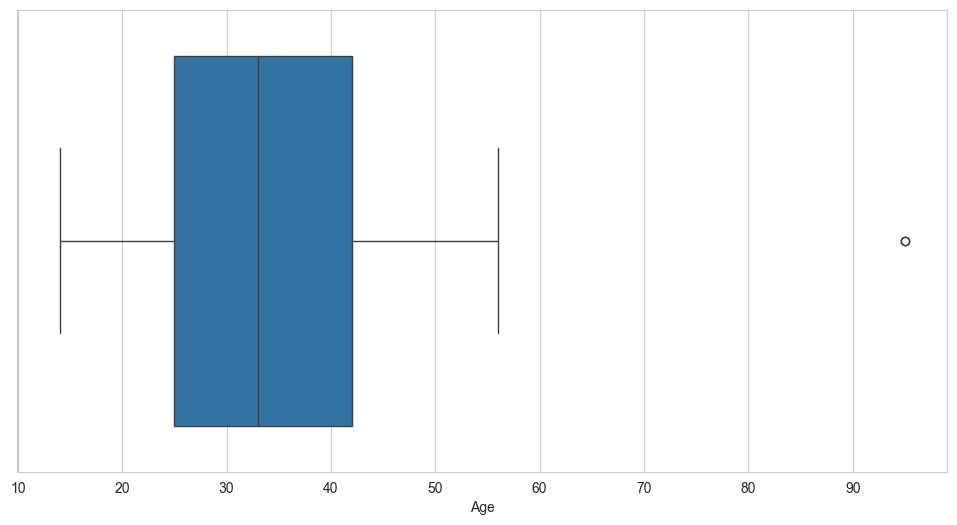

In [314]:
sns.boxplot(data= df, x= df.Age);

### Occupation

In [315]:
df.Occupation.value_counts()

Occupation
Lawyer          3245
Engineer        3118
Architect       3104
Mechanic        3089
MediaManager    3050
Developer       3042
Accountant      3042
Scientist       3017
Teacher         3009
Entrepreneur    3007
Journalist      2957
Doctor          2955
Manager         2906
Musician        2860
Writer          2852
Name: count, dtype: int64

In [316]:
df.Occupation.isna().sum()

3346

In [317]:
df.loc[pd.isna(df['Occupation']), 'Occupation'] = 'Other'

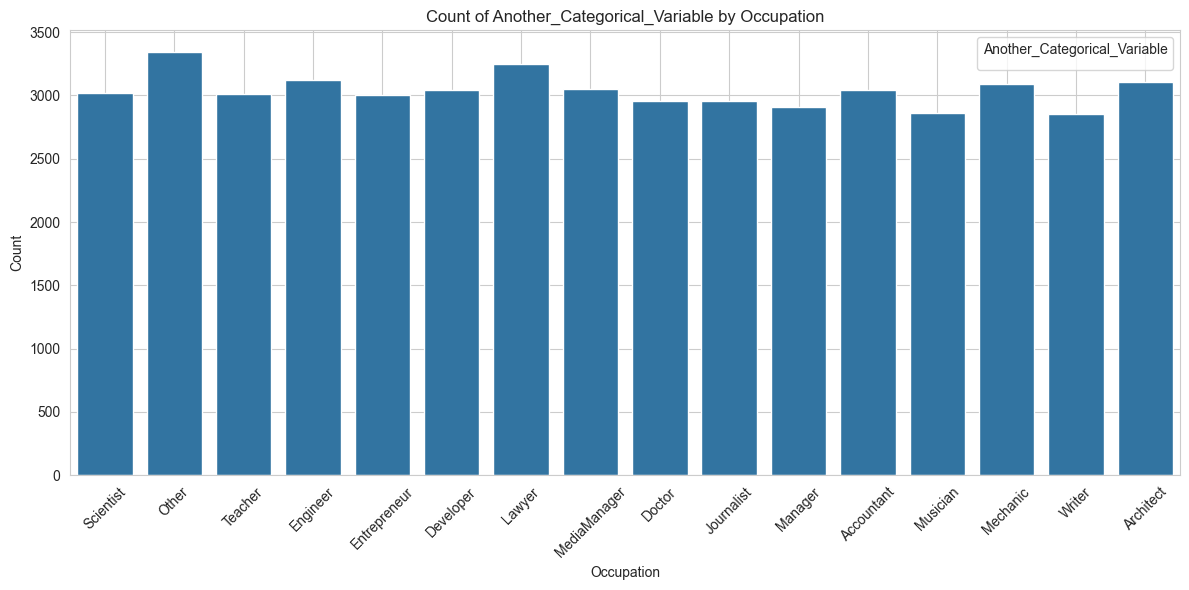

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Another_Categorical_Variable by Occupation')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

### Num_Bank_Accounts

In [319]:
non_numeric_values(df, 'Num_Bank_Accounts')

{'-'}

In [320]:
df[df.Num_Bank_Accounts < 0]['Num_Bank_Accounts'].count()

16

In [321]:
df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace=True)

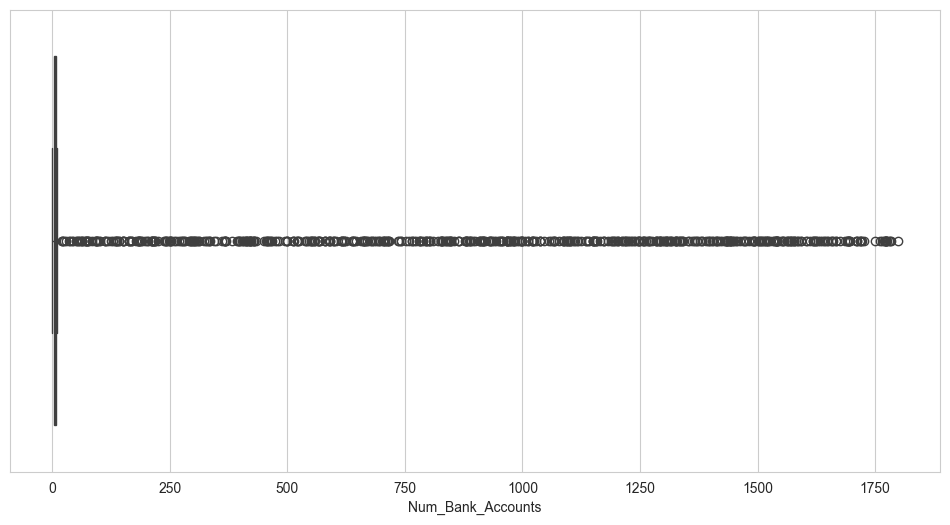

In [322]:
sns.boxplot(data= df, x = df.Num_Bank_Accounts);

### Num_of_Loan

In [323]:
non_numeric_values(df, 'Num_of_Loan')

{'-'}

In [324]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].unique()

array([-100], dtype=int64)

In [325]:
df['Num_of_Loan'].unique()

array([   4,    1,    3, 1381, -100,    0,    2,    7,    5,    6,    8,
          9,  965,  428,   50,  256,  495, 1018,  548, 1470, 1021,  744,
        238,  481,  617, 1237,  602,  582, 1225,  717, 1316, 1146, 1009,
        660,  505,  335, 1161,  765,  463,  864,  696,   95,  949,  720,
        181, 1090, 1048,   42,  385,  814, 1019,  452,  434,   77,  639,
        336,  249,  106,  498, 1073, 1259,  899,  769, 1292, 1266, 1365,
        114,  810,  994,  992,  828, 1248,  543, 1318, 1416,  919, 1391,
         58,  799, 1374,  746, 1487,  731,  445,  286, 1325, 1147,  808,
        511,  198, 1445, 1140,  876, 1304,  569,  350, 1221,  608,  621,
       1040, 1496,  570, 1063,  741,  230, 1428, 1361,  232, 1475,  653,
       1448,  523, 1414,  426, 1308,  647, 1068,  954, 1283,  909,  977,
       1333,  700,  486, 1027,  170,  359, 1108,  628, 1284, 1489, 1446,
         35,  483,  265,  928,  838, 1109, 1429, 1300,  547, 1385,  950,
       1153,  539, 1240,  376,  393,  610,  725, 14

In [326]:
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].count() # cannot be negative, dropping them

1920

In [327]:
df.drop(df[df['Num_of_Loan'] < 0].index, inplace=True)
df.shape

(46663, 19)

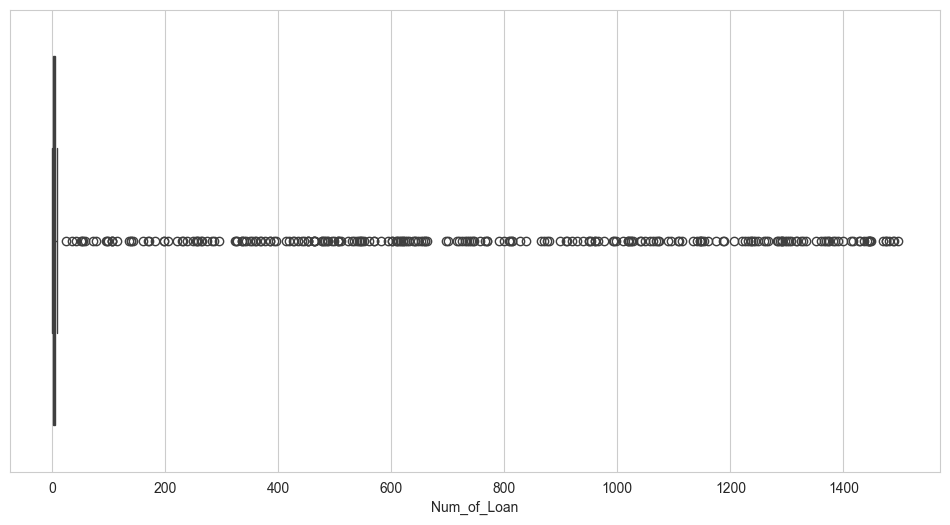

In [328]:
sns.boxplot(data= df, x = df.Num_of_Loan);

### Delay_from_due_date

In [329]:
non_numeric_values(df, 'Delay_from_due_date')

{'-'}

In [330]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].unique()  # not possible

array([-1, -2, -4, -3, -5], dtype=int64)

In [331]:
df['Num_of_Loan'].nunique()

244

In [332]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].count()

275

In [333]:
df.drop(df[df['Delay_from_due_date'] < 0].index, inplace=True)
df.shape

(46388, 19)

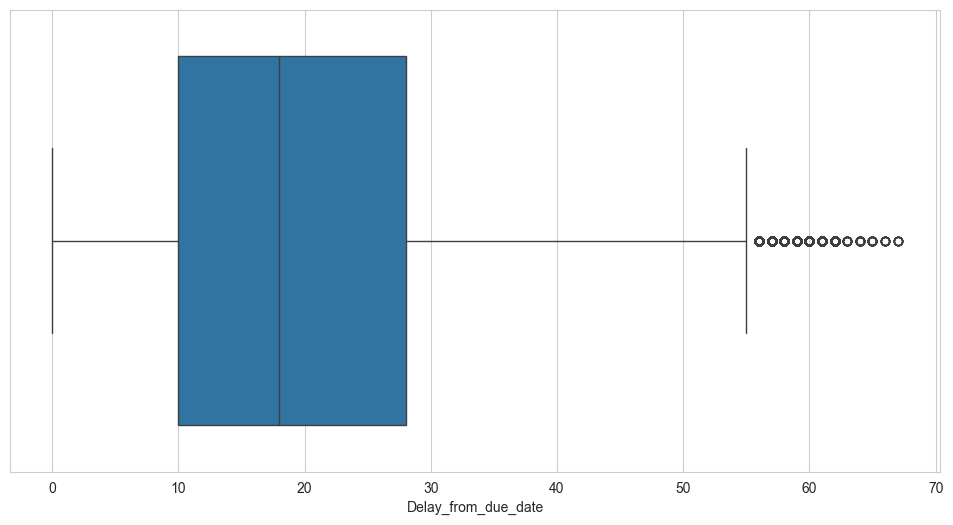

In [334]:
sns.boxplot(data= df, x = df.Delay_from_due_date);

### Num_of_Delayed_Payment

In [335]:
non_numeric_values(df, 'Num_of_Delayed_Payment')

{'-', 'nan'}

In [336]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].unique()

array([-2., -1., -3.])

In [337]:
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].count()

262

In [338]:
df.drop(df[df['Num_of_Delayed_Payment'] < 0].index, inplace=True)
df.shape

(46126, 19)

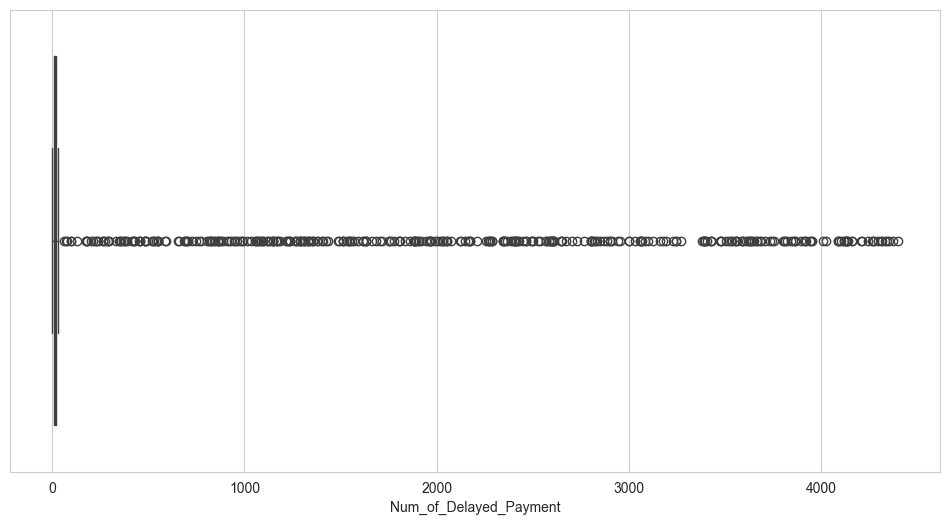

In [339]:
sns.boxplot(data= df, x = df['Num_of_Delayed_Payment'].dropna());

In [340]:
df['Num_of_Delayed_Payment'].value_counts().head(10)

Num_of_Delayed_Payment
19.000    2542
15.000    2512
16.000    2466
18.000    2462
17.000    2423
10.000    2410
12.000    2376
20.000    2368
11.000    2304
8.000     2241
Name: count, dtype: int64

In [341]:
from sklearn.impute import KNNImputer

def knn_impute_column(df, column_name, n_neighbors=5):
    """
    Fill missing values in a specific column using KNN imputation.

    Parameters:
    df (DataFrame): The DataFrame containing the column to be imputed.
    column_name (str): The name of the column to be imputed.
    n_neighbors (int): Number of neighbors to consider for imputation. Default is 5.

    Returns:
    DataFrame: The DataFrame with missing values in the specified column imputed.
    """

    # Extract the column to be imputed
    column_to_impute = df[[column_name]]

    # Create an instance of the KNNImputer class
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Fit and transform the imputer to fill missing values in the column
    column_imputed = imputer.fit_transform(column_to_impute)

    # Replace the original column with the imputed values
    df[column_name] = column_imputed

    return df


In [342]:
df = knn_impute_column(df, 'Num_of_Delayed_Payment')

# to specify the number of neighbors:
# df = knn_impute_column(df, 'Num_of_Delayed_Payment', n_neighbors=10)

In [343]:
df['Num_of_Delayed_Payment'].isna().sum()

0

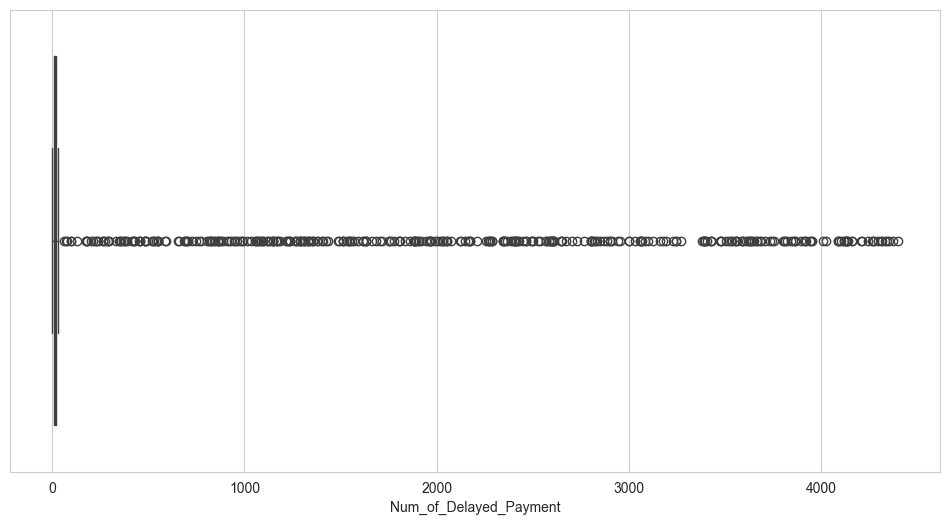

In [344]:
sns.boxplot(data= df, x = df['Num_of_Delayed_Payment']);

### Num_Credit_Inquiries

In [345]:
non_numeric_values(df, 'Num_Credit_Inquiries')

{'.', 'nan'}

In [346]:
df[df['Num_Credit_Inquiries'] < 0]['Num_Credit_Inquiries'].unique()

array([], dtype=float64)

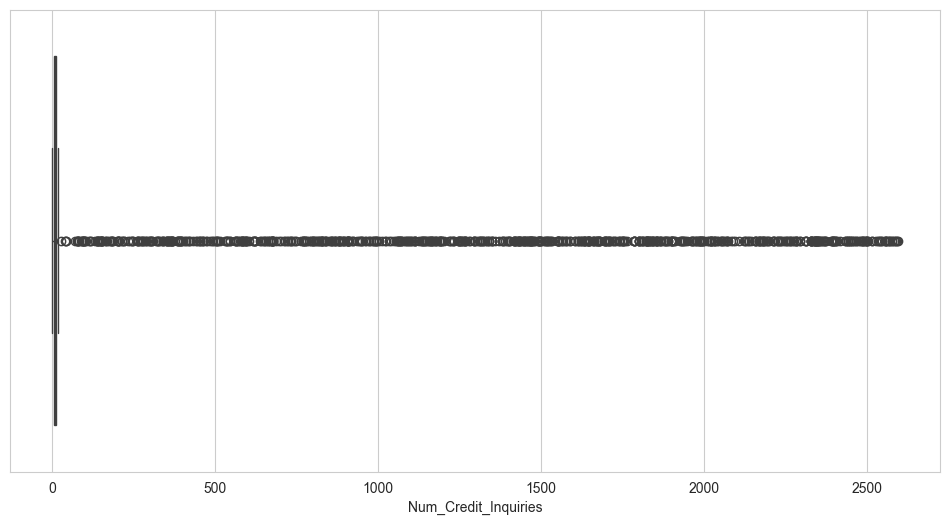

In [347]:
sns.boxplot(data= df, x = df['Num_Credit_Inquiries'].dropna());

In [348]:
df['Num_Credit_Inquiries'].isna().sum()

964

In [349]:
df['Num_Credit_Inquiries'].nunique()

700

In [350]:
df['Num_Credit_Inquiries'].value_counts().head(10)

Num_Credit_Inquiries
5.000     4310
6.000     4072
4.000     4022
7.000     3972
8.000     3613
9.000     3288
3.000     3131
11.000    2784
10.000    2765
12.000    2426
Name: count, dtype: int64

In [351]:
df = knn_impute_column(df, 'Num_Credit_Inquiries')
df['Num_Credit_Inquiries'].isna().sum()

0

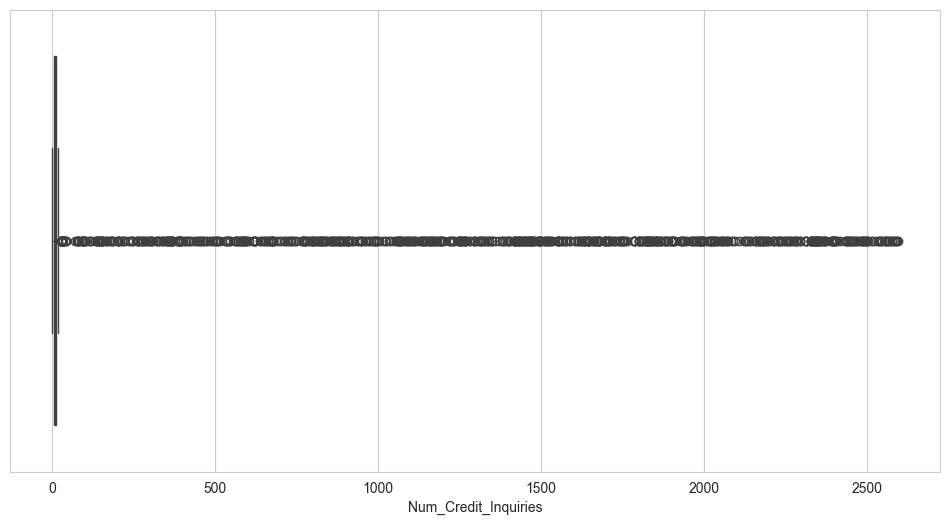

In [352]:
sns.boxplot(data= df, x = df['Num_Credit_Inquiries']);

### Credit_Mix

In [353]:
df.Credit_Mix.value_counts()

Credit_Mix
Standard    17143
Good        11020
Bad          8900
Name: count, dtype: int64

In [354]:
df.Credit_Mix.isna().sum()

9063

In [355]:
# Fill null values in 'Credit_Mix' with 'Unknown'
df['Credit_Mix'].fillna('Unknown', inplace=True)

df['Credit_Mix'].astype('object')

0           Good
1           Good
3           Good
4           Good
5           Good
          ...   
49994        Bad
49996       Good
49997       Good
49998       Good
49999    Unknown
Name: Credit_Mix, Length: 46126, dtype: object

In [356]:
df.Credit_Mix.value_counts()

Credit_Mix
Standard    17143
Good        11020
Unknown      9063
Bad          8900
Name: count, dtype: int64

### Credit_History_Age

In [357]:
df['Credit_History_Age'].value_counts()

Credit_History_Age
20 Years and 1 Months     241
18 Years and 6 Months     232
19 Years and 7 Months     231
16 Years and 6 Months     231
16 Years and 1 Months     231
                         ... 
4 Years and 5 Months       19
0 Years and 11 Months      15
33 Years and 11 Months     14
34 Years and 0 Months      13
0 Years and 10 Months      11
Name: count, Length: 399, dtype: int64

In [358]:
df['Credit_History_Age'].isna().sum()

4135

In [359]:
# Group by 'Credit_Mix' and calculate mode for 'Credit_History_Age' within each group
mode_by_credit_mix = df.groupby('Credit_Mix')['Credit_History_Age'].transform(lambda x: x.mode()[0])

# Fill NaN values in 'Credit_History_Age' with the mode for each group
df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)


In [360]:
df['Credit_History_Age'].isna().sum()

0

In [361]:
df['Credit_History_Age'].value_counts()

Credit_History_Age
19 Years and 1 Months     1739
18 Years and 7 Months     1190
19 Years and 7 Months     1061
14 Years and 1 Months      986
20 Years and 1 Months      241
                          ... 
4 Years and 5 Months        19
0 Years and 11 Months       15
33 Years and 11 Months      14
34 Years and 0 Months       13
0 Years and 10 Months       11
Name: count, Length: 399, dtype: int64

In [362]:
# Extract years and months from 'Credit_History_Age' column
df['Credit_History_Years'] = df['Credit_History_Age'].str.extract(r'(\d+) Years').astype(int)
df['Credit_History_Months'] = df['Credit_History_Age'].str.extract(r'(\d+) Months').astype(int)

df.drop(columns=['Credit_History_Age'], inplace=True)

df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Years,Credit_History_Months
0,23,Scientist,19114.12,3,4,3,4,3,7.000,2022.000,Good,809.98,35.030,No,49.575,236.64268203272135,LowspentSmallvaluepayments,186.26670208571772,22,9
1,24,Scientist,19114.12,3,4,3,4,3,9.000,4.000,Good,809.98,33.053,No,49.575,21.465380264657146,HighspentMediumvaluepayments,361.44400385378196,22,10
3,24,Scientist,19114.12,3,4,3,4,4,5.000,4.000,Good,809.98,32.431,No,49.575,39.08251089460281,HighspentMediumvaluepayments,343.82687322383634,23,0
4,28,Other,34847.84,2,4,6,1,3,1.000,5.000,Good,605.03,25.927,No,18.816,39.684018417945296,HighspentLargevaluepayments,485.2984336755923,27,3
5,28,Teacher,34847.84,2,4,6,1,3,3.000,5.000,Good,605.03,30.117,No,18.816,251.62736875017606,LowspentLargevaluepayments,303.3550833433617,27,4


In [363]:
# Convert years to months and add with months to get total months
df['Credit_History_Age_Months'] = df['Credit_History_Years'] * 12 + df['Credit_History_Months']

# Drop the 'Credit_History_Years' and 'Credit_History_Months' columns
df.drop(columns=['Credit_History_Years', 'Credit_History_Months'], inplace=True)

df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,3,7.000,2022.000,Good,809.98,35.030,No,49.575,236.64268203272135,LowspentSmallvaluepayments,186.26670208571772,273
1,24,Scientist,19114.12,3,4,3,4,3,9.000,4.000,Good,809.98,33.053,No,49.575,21.465380264657146,HighspentMediumvaluepayments,361.44400385378196,274
3,24,Scientist,19114.12,3,4,3,4,4,5.000,4.000,Good,809.98,32.431,No,49.575,39.08251089460281,HighspentMediumvaluepayments,343.82687322383634,276
4,28,Other,34847.84,2,4,6,1,3,1.000,5.000,Good,605.03,25.927,No,18.816,39.684018417945296,HighspentLargevaluepayments,485.2984336755923,327
5,28,Teacher,34847.84,2,4,6,1,3,3.000,5.000,Good,605.03,30.117,No,18.816,251.62736875017606,LowspentLargevaluepayments,303.3550833433617,328


### Payment_of_Min_Amount

In [364]:
df.Payment_of_Min_Amount.value_counts()

Payment_of_Min_Amount
Yes    24373
No     16188
NM      5565
Name: count, dtype: int64

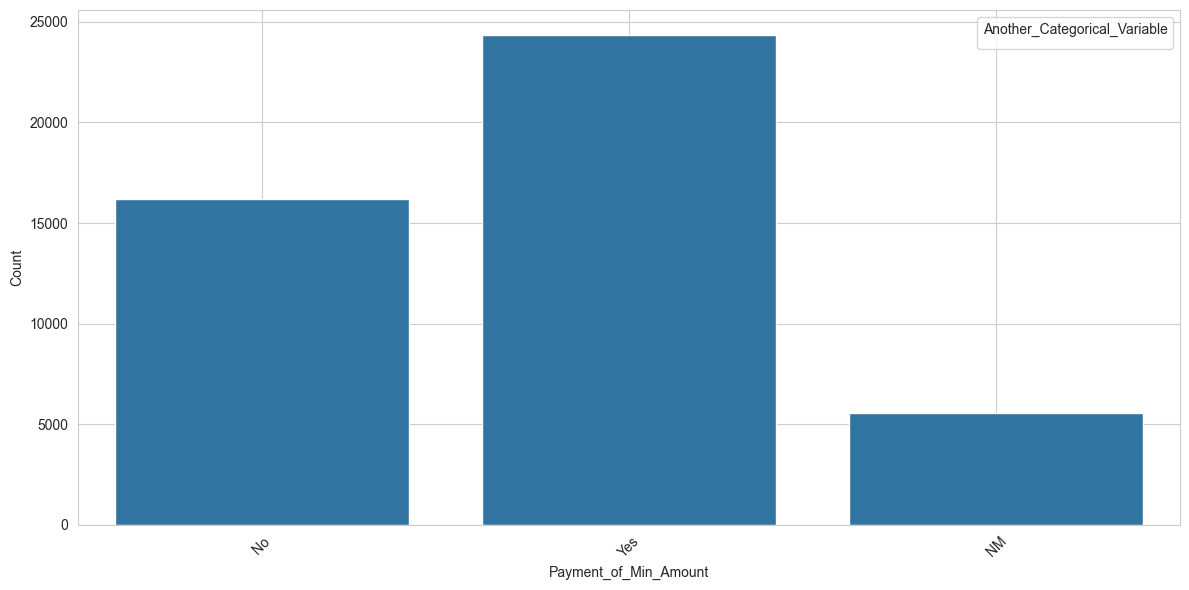

In [365]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_of_Min_Amount', data=df)
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

### Amount_invested_monthly

In [366]:
df.Amount_invested_monthly.nunique()

41928

In [367]:
non_numeric_values(df, 'Amount_invested_monthly')

{'.', 'nan'}

In [368]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df[df['Amount_invested_monthly'] < 0]['Amount_invested_monthly'].unique()

array([], dtype=float64)

In [369]:
df.Amount_invested_monthly.value_counts().head(15)

Amount_invested_monthly
10000.000    1990
0.000          98
236.643         1
74.765          1
131.505         1
42.516          1
13.824          1
13.570          1
64.270          1
93.279          1
42.651          1
57.042          1
85.461          1
86.311          1
395.140         1
Name: count, dtype: int64

In [370]:
df[df.Amount_invested_monthly.isna()].sample(15)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months
33159,27,Architect,33042.48,4,4,3,2,14,15.000,2.000,Good,226.72,39.564,No,54.988,NaN,LowspentSmallvaluepayments,139.80136305556923,284
40502,34,Other,53671.92,6,8,33,6,61,24.000,9.000,Unknown,3420.99,22.107,Yes,153.316,NaN,LowspentMediumvaluepayments,210.9304795293153,97
29463,25,Journalist,38721.44,6,6,19,5,24,23.000,9.000,Bad,3467.82,32.275,Yes,87.269,NaN,HighspentMediumvaluepayments,409.8595765092726,169
5781,42,Journalist,71695.68,3,6,19,2,5,8.000,3.000,Standard,529.91,24.095,Yes,94.633,NaN,LowspentMediumvaluepayments,229.67486650234986,296
29074,21,Writer,32412.72,9,6,32,9,40,23.000,12.000,Bad,3632.05,30.432,Yes,163.068,NaN,LowspentLargevaluepayments,219.00247509384846,128
37240,54,Developer,12741.58,5,7,9,3,24,19.000,2.000,Unknown,530.93,32.105,No,28.732,NaN,LowspentSmallvaluepayments,332.27251136966066,347
22470,21,Architect,18214.08,4,7,5,5,9,21.000,7.000,Standard,1581.51,28.956,Yes,45.838,NaN,HighspentMediumvaluepayments,335.1298719836356,155
34949,24,Other,83521.24,4,4,14,2,9,11.000,13.000,Standard,555.44,26.589,Yes,121.273,NaN,HighspentLargevaluepayments,655.3805582031583,260
34542,41,Writer,29715.16,4,6,16,5,18,9.000,8.000,Standard,1036.03,35.211,Yes,349.455,NaN,HighspentMediumvaluepayments,349.0667422342504,229
34297,30,Entrepreneur,30652.38,3,7,7,4,13,30.924,4.000,Good,267.45,31.983,No,55.084,NaN,HighspentMediumvaluepayments,439.49800124496886,372


In [371]:
df = knn_impute_column(df, 'Amount_invested_monthly')

In [372]:
df.Amount_invested_monthly.isna().sum()

0

In [373]:
df.Amount_invested_monthly.value_counts().head(10)

Amount_invested_monthly
637.648      2112
10000.000    1990
0.000          98
236.643         1
74.765          1
131.505         1
42.516          1
13.824          1
13.570          1
64.270          1
Name: count, dtype: int64

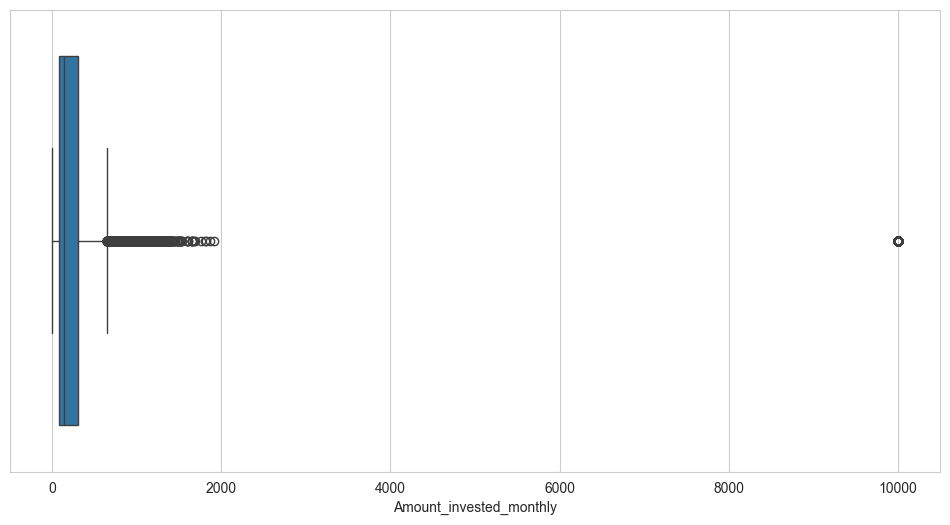

In [374]:
sns.boxplot(data= df, x = df['Amount_invested_monthly']);

In [375]:
df[df['Amount_invested_monthly'] == 10000]['Amount_invested_monthly'].count()

1990

### Payment_Behaviour

In [376]:
df.Payment_Behaviour.value_counts()

Payment_Behaviour
LowspentSmallvaluepayments      11758
HighspentMediumvaluepayments     8191
LowspentMediumvaluepayments      6300
HighspentLargevaluepayments      6282
HighspentSmallvaluepayments      5235
LowspentLargevaluepayments       4866
!@9#%8                           3494
Name: count, dtype: int64

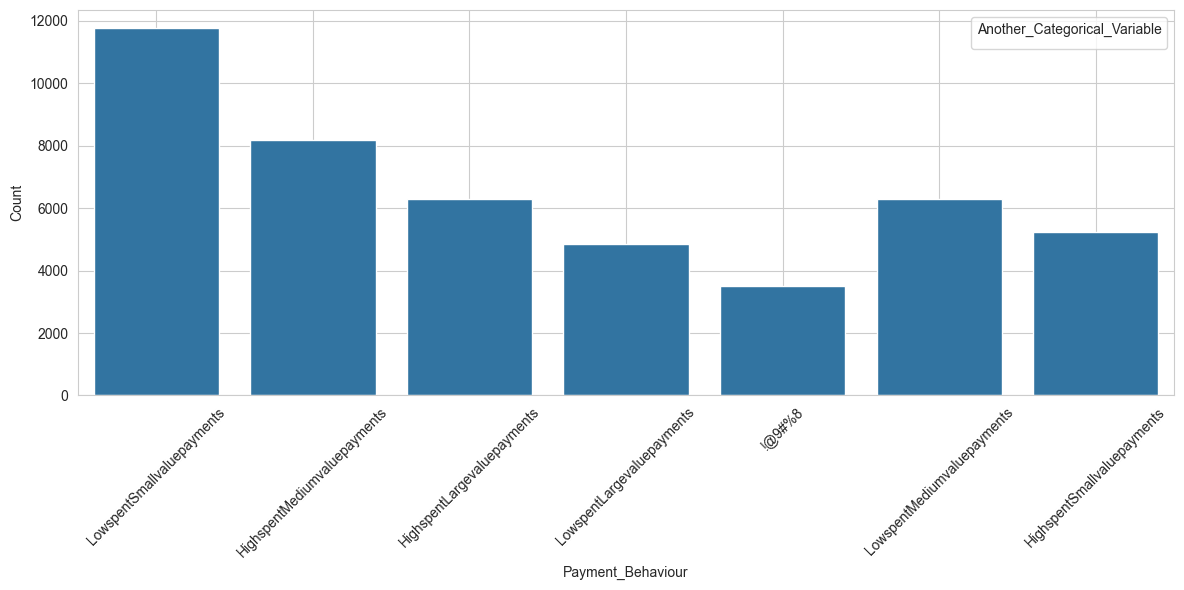

In [377]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_Behaviour', data=df)
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

In [378]:
# Replace '!@9#%8' with NaN
df['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)

# Impute missing values with mode
mode_value = df['Payment_Behaviour'].mode()[0]
df['Payment_Behaviour'].fillna(mode_value, inplace=True)


In [379]:
df.Payment_Behaviour.value_counts()

Payment_Behaviour
LowspentSmallvaluepayments      15252
HighspentMediumvaluepayments     8191
LowspentMediumvaluepayments      6300
HighspentLargevaluepayments      6282
HighspentSmallvaluepayments      5235
LowspentLargevaluepayments       4866
Name: count, dtype: int64

In [380]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Lowspent', 'Low_spent_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')

df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Smallvalue', 'Small_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Largevalue', 'Large_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Mediumvalue', 'Medium_value_')

df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      15252
High_spent_Medium_value_payments     8191
Low_spent_Medium_value_payments      6300
High_spent_Large_value_payments      6282
High_spent_Small_value_payments      5235
Low_spent_Large_value_payments       4866
Name: count, dtype: int64

### Monthly_Balance

In [381]:
df.Monthly_Balance.isna().sum()

518

In [382]:
non_numeric_values(df, 'Monthly_Balance')

{'-', '.', 'nan'}

In [383]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df[df['Monthly_Balance'] < 0]['Monthly_Balance'].count()

6

In [384]:
df.drop(df[df['Monthly_Balance'] < 0].index, inplace = True)

In [385]:
df['Monthly_Balance'].value_counts().head(15)

Monthly_Balance
186.267    1
202.309    1
892.511    1
404.146    1
315.223    1
392.765    1
171.771    1
216.142    1
250.909    1
410.927    1
270.621    1
345.811    1
299.959    1
310.445    1
306.038    1
Name: count, dtype: int64

In [386]:
df['Monthly_Balance'].max()

1606.5181919814756

In [387]:
df['Monthly_Balance'].min()

0.103402231183395

In [388]:
df['Monthly_Balance'].mean()

401.5754750169605

In [389]:
df = knn_impute_column(df, 'Monthly_Balance')
df.Monthly_Balance.isna().sum()

0

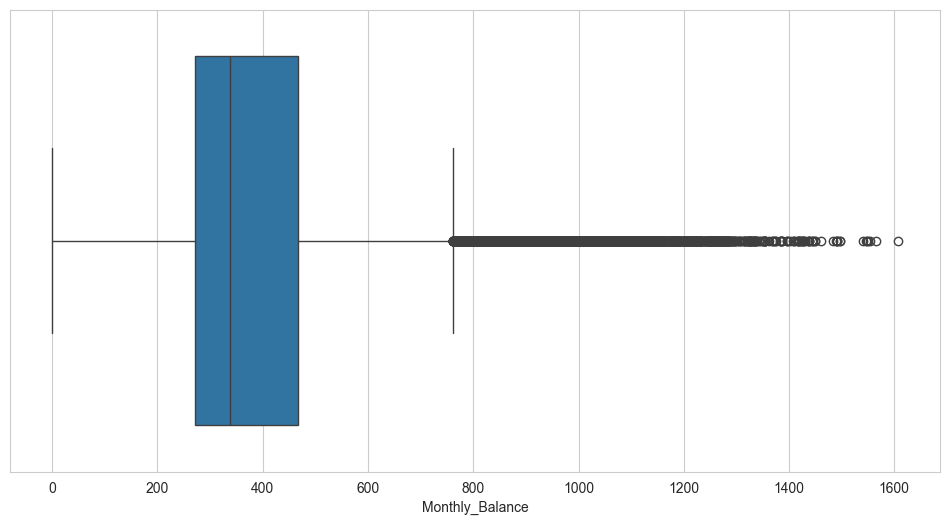

In [390]:
sns.boxplot(df, x= df['Monthly_Balance']);

In [391]:
# lastly change wrong dtypes..
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46120 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        46120 non-null  int64  
 1   Occupation                 46120 non-null  object 
 2   Annual_Income              46120 non-null  float64
 3   Num_Bank_Accounts          46120 non-null  int64  
 4   Num_Credit_Card            46120 non-null  int64  
 5   Interest_Rate              46120 non-null  int64  
 6   Num_of_Loan                46120 non-null  int64  
 7   Delay_from_due_date        46120 non-null  int64  
 8   Num_of_Delayed_Payment     46120 non-null  float64
 9   Num_Credit_Inquiries       46120 non-null  float64
 10  Credit_Mix                 46120 non-null  object 
 11  Outstanding_Debt           46120 non-null  float64
 12  Credit_Utilization_Ratio   46120 non-null  float64
 13  Payment_of_Min_Amount      46120 non-null  object 


### Monthly expenses

In [392]:
df['Monthly_expense'] = df['Annual_Income'] / 12 - df['Monthly_Balance']
df[df['Monthly_expense'] < 0]['Monthly_expense'].count()
df['Monthly_expense'] = df['Monthly_expense'].astype(float)

df.head()


,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months,Monthly_expense
0,23,Scientist,19114.120,3,4,3,4,3,7.000,2022.000,Good,809.980,35.030,No,49.575,236.643,Low_spent_Small_value_payments,186.267,273,1406.577
1,24,Scientist,19114.120,3,4,3,4,3,9.000,4.000,Good,809.980,33.053,No,49.575,21.465,High_spent_Medium_value_payments,361.444,274,1231.399
3,24,Scientist,19114.120,3,4,3,4,4,5.000,4.000,Good,809.980,32.431,No,49.575,39.083,High_spent_Medium_value_payments,343.827,276,1249.016
4,28,Other,34847.840,2,4,6,1,3,1.000,5.000,Good,605.030,25.927,No,18.816,39.684,High_spent_Large_value_payments,485.298,327,2418.688
5,28,Teacher,34847.840,2,4,6,1,3,3.000,5.000,Good,605.030,30.117,No,18.816,251.627,Low_spent_Large_value_payments,303.355,328,2600.632


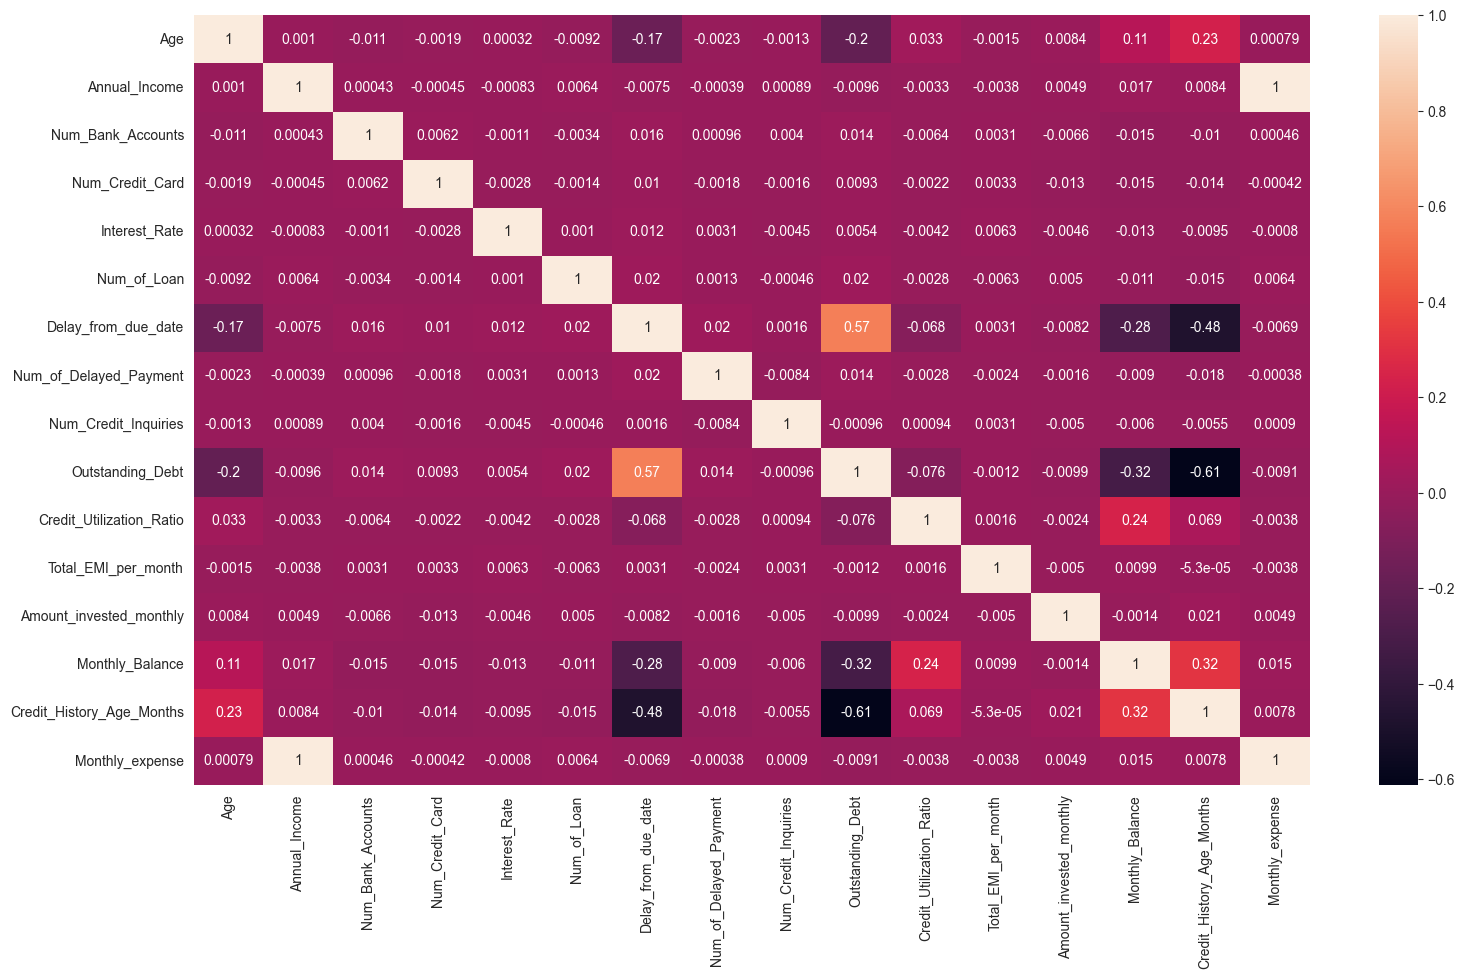

In [393]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True);

In [394]:
# sns.pairplot(df, corner=True);

# Save and read clean data

In [395]:
df.to_csv("Creditscore_test_cleaned.csv", index=False)

In [396]:
df = pd.read_csv(r"Creditscore_test_cleaned.csv")
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months,Monthly_expense
0,23,Scientist,19114.120,3,4,3,4,3,7.000,2022.000,Good,809.980,35.030,No,49.575,236.643,Low_spent_Small_value_payments,186.267,273,1406.577
1,24,Scientist,19114.120,3,4,3,4,3,9.000,4.000,Good,809.980,33.053,No,49.575,21.465,High_spent_Medium_value_payments,361.444,274,1231.399
2,24,Scientist,19114.120,3,4,3,4,4,5.000,4.000,Good,809.980,32.431,No,49.575,39.083,High_spent_Medium_value_payments,343.827,276,1249.016
3,28,Other,34847.840,2,4,6,1,3,1.000,5.000,Good,605.030,25.927,No,18.816,39.684,High_spent_Large_value_payments,485.298,327,2418.688
4,28,Teacher,34847.840,2,4,6,1,3,3.000,5.000,Good,605.030,30.117,No,18.816,251.627,Low_spent_Large_value_payments,303.355,328,2600.632
